# Histogram Plot Gallery

The histogram plot is used for visualizing the distribution of numerical data by grouping values into bins and showing frequencies. It's ideal for understanding data patterns, distributions, and identifying outliers or trends in your retail analytics.

Histogram plots excel at:
- **Distribution Analysis**: Visualize the spread and shape of key metrics like sales amounts or customer spending
- **Group Comparisons**: Compare distributions across categories like product types or customer segments
- **Range Analysis**: Focus on specific value ranges using clipping or filtering options
- **Outlier Detection**: Identify unusual patterns or extreme values in your data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyretailscience.plots import histogram

## Basic Histogram

Create a simple histogram from a single value column to visualize the distribution of your data.

---

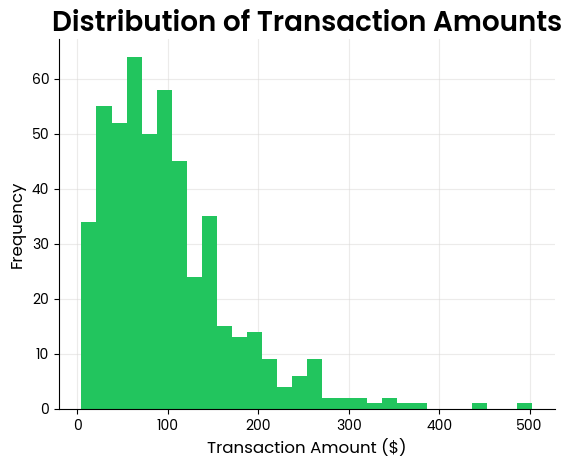

In [ ]:
# Create sample transaction amounts data
rng = np.random.default_rng(42)
# fmt: off
transaction_data = pd.DataFrame(
    {
        "transaction_amount": rng.gamma(2, 50, 500),
    },
)
# fmt: on

ax = histogram.plot(
    transaction_data,
    value_col="transaction_amount",
    title="Distribution of Transaction Amounts",
    x_label="Transaction Amount ($)",
    y_label="Frequency",
    bins=30,
)
plt.show()

## Multiple Histograms with group_col

Compare distributions across different categories using the `group_col` parameter. This creates separate overlaid histograms for each group.

---

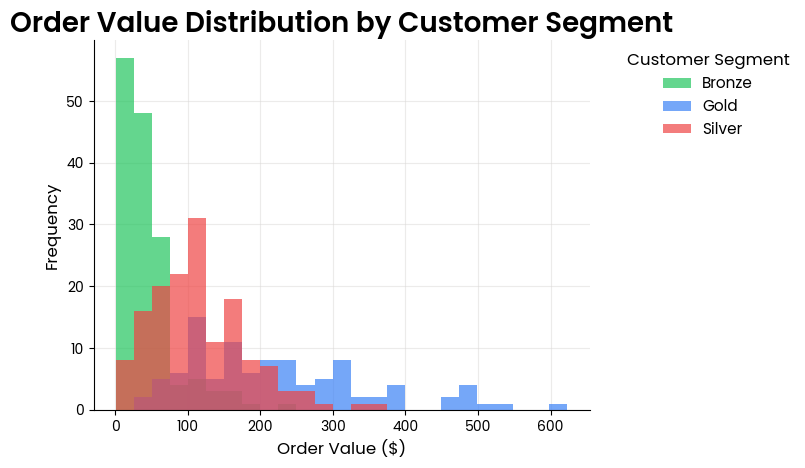

In [ ]:
# Create sample data with customer segments
rng = np.random.default_rng(42)
# fmt: off
segment_data = pd.DataFrame(
    {
        "customer_id": range(1, 401),
        "order_value": np.concatenate([
            rng.gamma(1.5, 30, 150),  # Bronze customers
            rng.gamma(2.5, 45, 150),  # Silver customers
            rng.gamma(3.5, 65, 100),  # Gold customers
        ]),
        "segment": ["Bronze"] * 150 + ["Silver"] * 150 + ["Gold"] * 100,
    },
)
# fmt: on

ax = histogram.plot(
    segment_data,
    value_col="order_value",
    group_col="segment",
    title="Order Value Distribution by Customer Segment",
    x_label="Order Value ($)",
    y_label="Frequency",
    legend_title="Customer Segment",
    move_legend_outside=True,
    bins=25,
)
plt.show()

## Multiple Value Columns

Plot multiple metrics simultaneously by passing a list to `value_col`. Note: This cannot be combined with `group_col`.

---

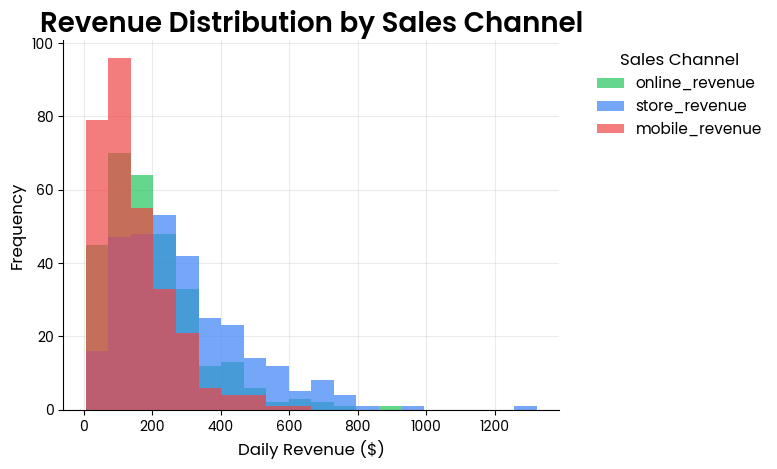

In [ ]:
# Create sample data with multiple metrics
rng = np.random.default_rng(42)
# fmt: off
metrics_data = pd.DataFrame(
    {
        "online_revenue": rng.gamma(2, 100, 300),
        "store_revenue": rng.gamma(2.5, 120, 300),
        "mobile_revenue": rng.gamma(1.8, 80, 300),
    },
)
# fmt: on

ax = histogram.plot(
    metrics_data,
    value_col=["online_revenue", "store_revenue", "mobile_revenue"],
    title="Revenue Distribution by Sales Channel",
    x_label="Daily Revenue ($)",
    y_label="Frequency",
    legend_title="Sales Channel",
    move_legend_outside=True,
    bins=20,
)
plt.show()

## Range Clipping

Focus on specific data ranges using `range_lower` and `range_upper` with `range_method="clip"` to limit values to the specified bounds.

---

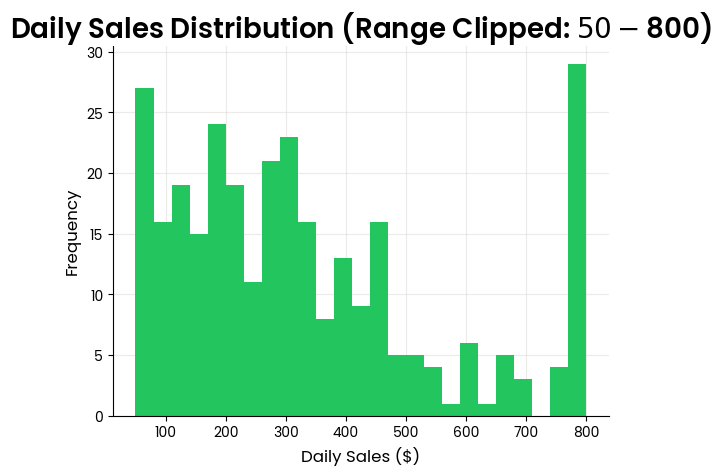

In [ ]:
# Create sample data with wide range including outliers
rng = np.random.default_rng(42)
# fmt: off
sales_data = pd.DataFrame(
    {
        "daily_sales": np.concatenate([
            rng.gamma(2, 150, 280),  # Regular sales
            rng.gamma(8, 300, 20),   # High outliers
        ]),
    },
)
# fmt: on

ax = histogram.plot(
    sales_data,
    value_col="daily_sales",
    range_lower=50,
    range_upper=800,
    range_method="clip",
    title="Daily Sales Distribution (Range Clipped: $50-$800)",
    x_label="Daily Sales ($)",
    y_label="Frequency",
    bins=25,
)
plt.show()